In [1]:
import math
import sys, getopt
#%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import urllib2, requests
sns.set_style("ticks")
sns.set_context("poster")
from matplotlib import cm
from bs4 import BeautifulSoup
import matplotlib.pyplot 
from sklearn import linear_model
from sklearn import preprocessing
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.ticker import LinearLocator, FormatStrFormatter

In [2]:
cor = pd.read_csv('corolla.csv', thousands = ',')
cor

,fuel_efficiency,location,make,price,vechile features,car make,type,model,year,odometer,body,transmission,Number of cylinders,capacity,fuel type
0,11,VIC,2014 Toyota Corolla Levin ZR Auto,20850,"Odometer\r\r\n46,519 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Levin ZR Auto,Corolla,2014,46519,Hatch,Automatic,4,1.8,Petrol
1,11,WA,2006 Toyota Corolla Conquest Auto,7989,"Odometer\r\r\n96,500 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Conquest Auto,Corolla,2006,96500,Hatch,Automatic,4,1.8,Petrol
2,11,NSW,2015 Toyota Corolla Ascent Sport Manual,19990,"Odometer\r\r\n10,318 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Sport Manual,Corolla,2015,10318,Hatch,Manual,4,1.8,Petrol
3,11,WA,2014 Toyota Corolla Ascent Auto,13990,"Odometer\r\r\n71,408 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2014,71408,Sedan,Automatic,4,1.8,Petrol
4,11,SA,2007 Toyota Corolla Conquest Auto,11998,"Odometer\r\r\n29,115 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Conquest Auto,Corolla,2007,29115,Sedan,Automatic,4,1.8,Petrol
5,11,NSW,2007 Toyota Corolla Ascent Auto,11990,"Odometer\r\r\n125,209 km\r\r\n\r\r\n\r\r\nBody...",Toyota,Corolla Ascent Auto,Corolla,2007,125209,Sedan,Automatic,4,1.8,Petrol
6,11,WA,2007 Toyota Corolla Ascent Auto,8990,"Odometer\r\r\n126,880 km\r\r\n\r\r\n\r\r\nBody...",Toyota,Corolla Ascent Auto,Corolla,2007,126880,Sedan,Automatic,4,1.8,Petrol
7,11,NSW,2013 Toyota Corolla Ascent Auto,15888,"Odometer\r\r\n59,162 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2013,59162,Sedan,Automatic,4,1.8,Petrol
8,11,VIC,2007 Toyota Corolla Ascent Auto,12850,"Odometer\r\r\n25,982 km\r\r\n\r\r\n\r\r\nBody\...",Toyota,Corolla Ascent Auto,Corolla,2007,25982,Hatch,Automatic,4,1.8,Petrol
9,11,VIC,2015 Toyota Corolla SX Auto,26888,"Odometer\r\r\n9,476 km\r\r\n\r\r\n\r\r\nBody\r...",Toyota,Corolla SX Auto,Corolla,2015,9476,Hatch,Automatic,4,1.8,Petrol


In [3]:
cor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3397 entries, 0 to 3396
Data columns (total 15 columns):
fuel_efficiency        3397 non-null int64
location               3397 non-null object
make                   3397 non-null object
price                  3397 non-null int64
vechile features       3397 non-null object
car make               3397 non-null object
type                   3397 non-null object
model                  3397 non-null object
year                   3397 non-null int64
odometer               3397 non-null int64
body                   3397 non-null object
transmission           3397 non-null object
Number of cylinders    3397 non-null int64
capacity               3397 non-null float64
fuel type              3397 non-null object
dtypes: float64(1), int64(5), object(9)
memory usage: 398.2+ KB


In [4]:
cor.describe()

,fuel_efficiency,price,year,odometer,Number of cylinders,capacity
count,3397.0,3397.000000,3397.000000,3397.000000,3397.0,3397.000000
mean,11.0,12712.374154,2009.443921,93639.964086,4.0,1.793318
std,0.0,6325.436554,5.203926,69126.368582,0.0,0.037195
min,11.0,400.000000,1984.000000,1.000000,4.0,1.300000
25%,11.0,7990.000000,2007.000000,41500.000000,4.0,1.800000
50%,11.0,12888.000000,2011.000000,76801.000000,4.0,1.800000
75%,11.0,16990.000000,2014.000000,133600.000000,4.0,1.800000
max,11.0,35449.000000,2016.000000,785500.000000,4.0,2.000000


In [6]:
cor['age'] = 2016 - cor['year']
cor['utilization_ratio'] = (cor.odometer)/(cor.age)

In [31]:
cor.odometer.values

array([ 46519,  96500,  10318, ...,      1,  75600, 149609], dtype=int64)

#### Preparation data sets for Pareto analysis

In [9]:
!pip install pybrain

  Running setup.py bdist_wheel for pybrain: started
  Running setup.py bdist_wheel for pybrain: finished with status 'done'
  Stored in directory: C:\Users\voyo\AppData\Local\pip\Cache\wheels\b1\62\4a\a9d5bf1cc3bacedf6f5aa6e04aaa7fbd58d3247e7db71e952a
Successfully built pybrain


Start Learning
End Learning
Plotting the Results
All Evaluations


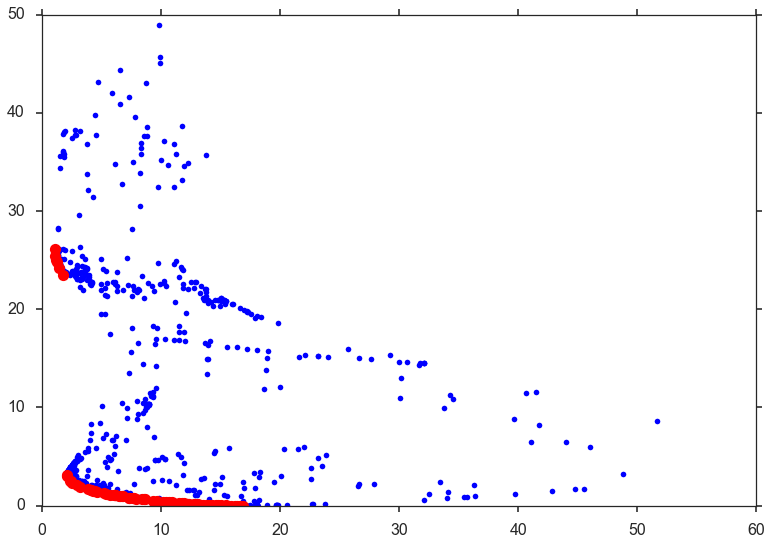

Pareto Front


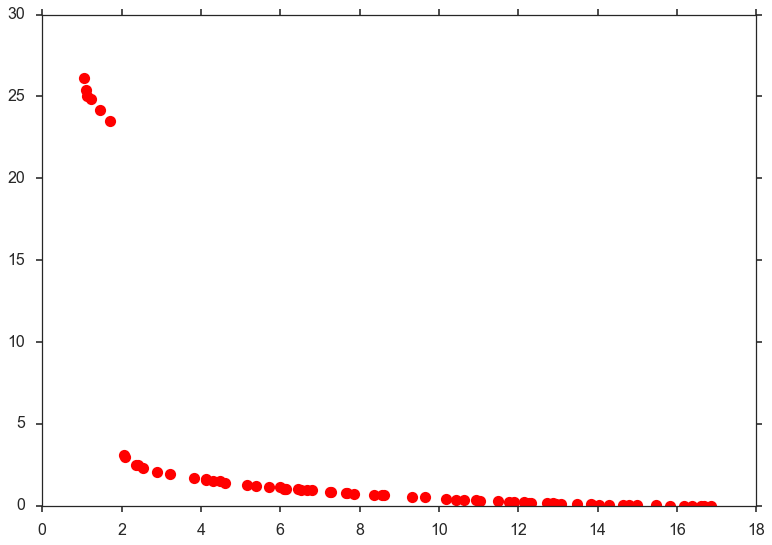

= Results =
('Population size ', 50)
('Elitism Proportion ', 1.0)
('Mutation Probability ', 0.5)
('Mutation Std Deviation ', 0.1)
('Objective Evaluation number ', 1303)
('last generation Length of bestEvaluation ', 70)
Best Evaluable : Best Evaluation
((-3.1109318803329358, -0.74481362804596407), ':', array([ 13.82812464,   0.07742597]))
((-2.9931459928733708, -0.9998445916005243), ':', array([  1.68660406e+01,   4.70015655e-05]))
((-3.1415926535897931, 0.51306151503973596), ':', array([ 2.54231456,  2.30940363]))
((-3.1369379692072763, -0.57952289016832459), ':', array([ 12.14816247,   0.19555301]))
((-3.1415926535897931, 0.11094182474014339), ':', array([ 5.16122865,  1.25424022]))
((-3.1415926535897931, -0.79681066042776005), ':', array([ 13.85521147,   0.06133439]))
((-3.1109318803329358, 0.25975498520320811), ':', array([ 4.12053877,  1.5992885 ]))
((-3.0133171313722156, -1.0059241668021279), ':', array([  1.66160399e+01,   2.12441740e-04]))
((-3.1415926535897931, -0.5577913495719

In [2]:
import pybrain
#!/usr/bin/env python
""" An illustration of using the NSGA-II multi-objective optimization algorithm
on Unconstrained Multi-Objective Optimization benchmark function. """

__author__ = 'Jean Pierre Queau, jeanpierre.queau@sbmoffshore.com'

from pybrain.optimization import MultiObjectiveGA
from pybrain.rl.environments.functions.multiobjective import Deb, Pol
import pylab
from scipy import zeros, array

# The Deb function
#f = Deb()
# The Pol function
f = Pol()

# start at the origin
x0 = zeros(f.indim)

x0 = array([min_ for min_, max_ in f.xbound])

# the optimization for a maximum of 25 generations
n = MultiObjectiveGA(f, x0, storeAllEvaluations = True, populationSize = 50, eliteProportion = 1.0,
    topProportion = 1.0, mutationProb = 0.5, mutationStdDev = 0.1, storeAllPopulations = True, allowEquality = False)
print('Start Learning')
n.learn(30)
print('End Learning')

# plotting the results (blue = all evaluated points, red = resulting pareto front)
print('Plotting the Results')
print('All Evaluations')
for x in n._allEvaluations: pylab.plot([x[0]], [x[1]], 'b.')
for x in n.bestEvaluation: pylab.plot([x[0]], [x[1]], 'ro')
pylab.show()
print('Pareto Front')
for x in n.bestEvaluation: pylab.plot([x[0]], [x[1]], 'ro')
pylab.show()
print('===========')
print('= Results =') 
print('===========')
'''
i=0
for gen in n._allGenerations:
    print 'Generation: ',i
    for j in range(len(gen[1])):
        print gen[1].keys()[j],gen[1].values()[j]
    i+=1
'''
print('Population size ',n.populationSize)
print('Elitism Proportion ',n.eliteProportion)
print('Mutation Probability ',n.mutationProb)
print('Mutation Std Deviation ',n.mutationStdDev)
print('Objective Evaluation number ',n.numEvaluations)
print('last generation Length of bestEvaluation ',len(n.bestEvaluation))
print('Best Evaluable : Best Evaluation')
for i in range(len(n.bestEvaluation)):
    assert len(n.bestEvaluation) == len(n.bestEvaluable)
    print(n.bestEvaluable[i],':',n.bestEvaluation[i])


In [15]:
"""
Copyright (C) 2013 Matthew Woodruff and Jon Herman.

This script is free software: you can redistribute it and/or modify
it under the terms of the GNU Lesser General Public License as published by
the Free Software Foundation, either version 3 of the License, or
(at your option) any later version.

This script is distributed in the hope that it will be useful,
but WITHOUT ANY WARRANTY; without even the implied warranty of
MERCHANTABILITY or FITNESS FOR A PARTICULAR PURPOSE. See the
GNU Lesser General Public License for more details.

You should have received a copy of the GNU Lesser General Public License
along with this script. If not, see <http://www.gnu.org/licenses/>.
===========================================================
pareto.py

Perform epsilon-nondominated sort on input files.

Please cite the following works if publishing results obtained using this
script.

For pareto.py:

@misc{woodruff_herman_2013_pareto,
    author = {Woodruff, Matthew and Herman, Jon},
    year = {2013},
    title = {pareto.py: a $\\varepsilon-nondomination$ sorting routine},
    howpublished = {https://github.com/matthewjwoodruff/pareto.py}
}

For epsilon-nondomination:
@article{deb_2005_emoea,
    author = { Deb, K. and Mohan, M. and Mishra, S},
    year = {2005},
    title = {Evaluating the $\\varepsilon$-domination based
        multiobjective evolutionary algorithm for a quick
        computation of Pareto-optimal solutions.},
    journal = {Evolutionary Computation Journal},
    volume= {13}, number = {4}, pages ={501--525}
}

For a fast nondominated sort:
@article{deb_2002_nsga2,
    title="A fast and elitist multiobjective genetic algorithm: {NSGA-II}",
    author="Deb, Kalyanmoy and Pratap, A and Agarwal, S and Meyarivan, T",
    volume="6", number="2",
    journal="{IEEE} Transactions on Evolutionary Computation",
    year="2002",
    pages="182--197"
}
"""
__version__ = "1.1.1-3"

import sys
import math
import argparse

def get_args(argv):
    """ Get command line arguments """
    prog = argv.pop(0)
    parser = argparse.ArgumentParser(prog=prog,
        description='Nondomination Sort for Multiple Files')
    parser.add_argument('inputs', type=argparse.FileType('r'), nargs='+',
                        help='input filenames, use - for standard input')
    parser.add_argument('-o', '--objectives', type=intrange, nargs='+',
                        help='objective columns (zero-indexed)')
    parser.add_argument('-e', '--epsilons', type=float, nargs='+',
                        help='epsilons, one per objective')
    parser.add_argument('-m', '--maximize', type=intrange, nargs='+',
                        help='objective columns to maximize')
    parser.add_argument('-M', '--maximize-all', action="store_true",
                        help='maximize all objectives')
    parser.add_argument('--output', type=argparse.FileType('w'),
                        default=sys.stdout,
                        help='output filename, default to standard output')

    delimiters = parser.add_mutually_exclusive_group()
    delimiters.add_argument('-d', '--delimiter', type=str, default=' ',
                        help='input column delimiter, default to space (" ")')
    delimiters.add_argument('--tabs', action="store_true",
                        help="use tabs as delimiter")

    parser.add_argument('--print-only-objectives', action='store_true',
                        default=False, help='print only objectives in output')
    parser.add_argument("--blank", action="store_true",
                        help="skip blank lines")
    parser.add_argument("-c", "--comment", type=str, nargs="+", default=[],
                        help="skip lines starting with this character")
    parser.add_argument("--header", type=int, default=0,
                        help="number of header lines to skip")
    parser.add_argument("--contribution", action="store_true",
                        help="append filename where solution originated")
    parser.add_argument("--line-number", action="store_true",
                        help="also append line number to solution if "\
                             "--contribution is used.")
    parser.add_argument("--reverse-column-indices", action='store_true',
                        default=False, help='Reverse the order of column '\
                        'indices.  May be useful if your objectives are '\
                        'at the end of a row of unknown length.  Make sure '\
                        '-e and -m are consistent with the order you '\
                        'specify.')


    args = parser.parse_args(argv)

    args.objectives = rerange(args.objectives)
    args.maximize = rerange(args.maximize)

    if args.reverse_column_indices:
        if args.objectives is not None:
            args.objectives = [-1 - ob for ob in args.objectives]
        if args.maximize is not None:
            args.maximize = [-1 -ob for ob in args.maximize]

    if args.tabs:
        args.delimiter = "\t"

    return args

def rerange(intranges):
    """ convert a set of intranges into a list of integers """
    if intranges is None:
        return None
    thelist = []
    for therange in intranges:
        thelist.extend(therange)
    return thelist

def intrange(arg):
    """ convert a command-line argument to a list of integers """
    acceptable_chars = [str(x) for x in range(10)]
    acceptable_chars.append("-")

    partial = []
    first = None

    msg = "Could not convert {0} to index range.".format(arg)
    err = TypeError(msg)

    for char in arg:
        if char not in acceptable_chars:
            raise err
        if char == "-":
            if len(partial) == 0:
                raise err
            elif first is None:
                first = int("".join(partial))
                partial = []
            else: # this means there's a second -, which is not ok
                raise err
        else:
            partial.append(char)

    second = None
    if first is None:
        first = int("".join(partial))
    elif len(partial) == 0:
        raise err
    else:
        second = int("".join(partial))

    if second is None:
        return [first]
    elif second - first >= 0:
        return range(first, second+1)
    else:
        return range(first, second-1, -1)

class SortParameterError(Exception): pass

class Archive(object):
    """
    An archive of epsilon-nondominated solutions.
    Allows auxiliary information to tag along for the sort
    process.

    The eps_sort function provides a much more convenient interface than
    the Archive class.
    """
    def __init__(self, epsilons):
        """
        epsilons: sizes of epsilon boxes to use in the sort.  Number
                  of objectives is inferred by the number of epsilons.
        """
        self.archive = []       # objectives
        self.tagalongs = []     # tag-along data
        self.boxes = []         # remember for efficiency
        self.epsilons = epsilons
        self.itobj = range(len(epsilons)) # infer number of objectives

    def add(self, objectives, tagalong, ebox):
        """ add a solution to the archive, plus auxiliary information """
        self.archive.append(objectives)
        self.tagalongs.append(tagalong)
        self.boxes.append(ebox)

    def remove(self, index):
        """ remove a solution from the archive """
        self.archive.pop(index)
        self.tagalongs.pop(index)
        self.boxes.pop(index)

    def sortinto(self, objectives, tagalong=None):
        """
        Sort a solution into the archive.  Add it if it's nondominated
        w.r.t current solutions.

        objectives: objectives by which to sort.  Minimization is assumed.
        tagalong:   data to preserve with the objectives.  Probably the actual
                    solution is here, the objectives having been extracted
                    and possibly transformed.  Tagalong data can be *anything*.
                    We don't inspect it, just keep a reference to it for as
                    long as the solution is in the archive, and then return
                    it in the end.
        """
        # Here's how the early loop exits in this code work:
        # break:    Stop iterating the box comparison for loop because we know
        #           the solutions are in relatively nondominated boxes.
        # continue: Start the next while loop iteration immediately (i.e.
        #           jump ahead to the comparison with the next archive member).
        # return:   The candidate solution is dominated, stop comparing it to
        #           the archive, don't add it, immediately exit the method.

        ebox = [math.floor(objectives[ii] / self.epsilons[ii])
                for ii in self.itobj]

        asize = len(self.archive)

        ai = -1 # ai: archive index
        while ai < asize - 1:
            ai += 1
            adominate = False # archive dominates
            sdominate = False # solution dominates
            nondominate = False # neither dominates

            abox = self.boxes[ai]

            for oo in self.itobj:
                if abox[oo] < ebox[oo]:
                    adominate = True
                    if sdominate: # nondomination
                        nondominate = True
                        break # for
                elif abox[oo] > ebox[oo]:
                    sdominate = True
                    if adominate: # nondomination
                        nondominate = True
                        break # for

            if nondominate:
                continue # while
            if adominate: # candidate solution was dominated
                return
            if sdominate: # candidate solution dominated archive solution
                self.remove(ai)
                ai -= 1
                asize -= 1
                continue # while

            # solutions are in the same box
            aobj = self.archive[ai]
            corner = [ebox[ii] * self.epsilons[ii] for ii in self.itobj]
            sdist = sum([(objectives[ii] - corner[ii]) **2
                         for ii in self.itobj])
            adist = sum([(aobj[ii] - corner[ii]) **2 for ii in self.itobj])
            if adist < sdist: # archive dominates
                return
            else: # solution dominates
                self.remove(ai)
                ai -= 1
                asize -= 1
                # Need a continue here if we ever reorder the while loop.
                continue # while

        # if you get here, then no archive solution has dominated this one
        self.add(objectives, tagalong, ebox)

class SortInputError(Exception):
    """ Information about a defective input """
    def __init__(self, msg, row, table):
        super(SortInputError, self).__init__(msg)
        self.row = row
        self.table = table

def noannotation(table):
    """ produce solutions with no annotation from a table """
    empty = []
    for row in table:
        yield (row, empty)

def numbering(table, tag):
    """
    generator function 
    annotate each row in the table with tag and line number
    table: iterable, but probably a list of lists
    tag: anything, but probably a string or an integer
    """
    linenumber = 0
    for row in table:
        yield (row, [tag, linenumber])
        linenumber += 1

def numbers():
    """
    generator function yielding the numbers 0, 1, 2...
    (Is there an easier way to express this?)
    """
    ii = 0
    while True:
        yield ii
        ii += 1

def as_table(table):
    """
    try to convert a single table to something row-iterable
    if it's a generator, assume it's ok
    table: something tabular
    """
    try: # is it a Pandas DataFrame?
        mat = table.as_matrix()
    except AttributeError:
        mat = table

    try: # is it a double-subscriptable NumPy ndarray?
        mat.tolist
        mat[0].tolist
        mat[0][0]
        rowit = (x.tolist() for x in mat)
    except (AttributeError, IndexError): 
        rowit = table

    try: # is it a generator?
        rowit.send
        rowit.close
        return rowit
    except AttributeError:
        pass

    try: # is it double-subscriptable and not strings?
        rowit[0][0]
        try:
            rowit[0].capitalize
            raise TypeError()
        except AttributeError:
            # copy the data as needed
            return ([v for v in r] for r in rowit)
    except (AttributeError, IndexError):
        raise TypeError()

    raise TypeError()

def as_tables(tables):
    """
    generator function yielding each table as something row-iterable
    """
    msg = "Failed to make input {0} row-iterable"
    ii = 0

    # process a list of tables
    for table in tables:
        try:
            tab = as_table(table)
        except TypeError:
            raise TypeError(msg.format(ii))
        
        yield tab
        ii += 1

def flag_nondominated(tables, objectives=None, epsilons=None, **kwargs):
    """
    wrapper to eps_sort that returns a list of lists indicating which
    rows from each table were nondominated
    This function will fail if you can't call len() on each table.

    tables: input data, must be iterable
            each table can be a DataFrame, an ndarray, a list of lists.
            A single table is also an acceptable input.
    objectives: list of column indices in which objectives can be found,
                if None default to all columns
    epsilons: list of epsilons for the sort, if None default to 1e-9

    Keyword arguments:
    *maximize*      columns to maximize
    *maximize_all*  maximize all columns
    """
    kwargs.update({"attribution": True})

    singletable = False
    try:
        sorttables = [x for x in as_tables(tables)]
    except TypeError:
        sorttables = [x for x in as_tables([tables])]
        singletable = True

    tagalongs = eps_sort(sorttables, objectives, epsilons, **kwargs)

    masks = []
    if singletable is True:
        tables = [tables]
    gaps = []
    lasts = []
    numbers = []
    for table in tables:
        masks.append(list())
        gaps.append(0)
        lasts.append(-1)
        numbers.append(-1)
    for row in tagalongs:
        tab = row[-2]
        numbers[tab] = row[-1]
        gaps[tab] = numbers[tab] - lasts[tab] - 1
        lasts[tab] = numbers[tab]
        masks[tab].extend([False] * gaps[tab])
        masks[tab].append(True)
    for tab in range(len(tables)):
        gaps[tab] = len(tables[tab]) - numbers[tab] - 1
        masks[tab].extend([False] * gaps[tab])

    if singletable is True:
        masks = masks[0]

    return masks

def eps_sort(tables, objectives=None, epsilons=None, **kwargs):
    """
    return epsilon-nondominated solutions

    tables: input data, must be iterable
            each table can be a DataFrame, an ndarray, a list of lists.
            A single table is also an acceptable input.
    objectives: list of column indices in which objectives can be found,
                if None default to all columns
    epsilons: list of epsilons for the sort, if None default to 1e-9

    Keyword arguments:
    *maximize*      columns to maximize
    *maximize_all*  maximize all columns
    *attribution*   True: add table number, row number to rows

    Duplicates some of cli() for a programmatic interface
    """
    try:
        tables = [x for x in as_tables(tables)]
    except TypeError:
        tables = [x for x in as_tables([tables])]

    attribution = kwargs.get("attribution")

    if attribution is True:
        tables = [numbering(table, ii) for table, ii in zip(tables, numbers())]
    else:
        tables = [noannotation(table) for table in tables]

    tables = [withobjectives(annotatedrows, objectives)
              for annotatedrows in tables]

    tomaximize = kwargs.get("maximize", None)
    maximize_all = kwargs.get("maximize_all", False)

    if tomaximize is not None or maximize_all:
        if objectives is None:
            mindices = tomaximize
        elif maximize_all:
            mindices = None
        else:
            mindices = [objectives.index(i) for i in tomaximize]
        tables = [maximize(solutions, mindices) for solutions in tables]

    # tagalongs is the *raw* data
    tagalongs = eps_sort_solutions(tables, epsilons)

    return tagalongs

def eps_sort_solutions(tables, epsilons=None):
    """
    Perform an epsilon-nondominated sort
    tables: input (objectives, row) tuples
    epsilons: epsilon values for the objectives.  Assume 1e-9 if none
    """
    # slip the first row off the first table to figure out nobj
    objectives, row = next(tables[0])
    table = [(objectives, row)]
    tables = [table] + tables

    nobj = len(objectives)
    if epsilons is None:
        epsilons = [1e-9] * len(objectives)
    elif len(epsilons) != nobj:
        msg = "{0} epsilons, but {1} objectives".format(len(epsilons), nobj)
        raise SortParameterError(msg)

    archive = Archive(epsilons)

    for table in tables:
        for objectives, row in table:
            archive.sortinto(objectives, row)

    return archive.tagalongs

def attribution(stream, tag, number=False):
    """
    extract lines from stream and augment with tag
    """
    if number:
        linenumber = 0
        for line in stream:
            linenumber += 1
            line = line.strip()
            yield (line, [tag, str(linenumber)])
    else:
        for line in stream:
            line = line.strip()
            yield (line, [tag])

def noattribution(stream):
    """
    extract lines from stream and augment with null attribution
    """
    empty = []
    for line in stream:
        line = line.strip()
        yield (line, empty)

def filter_lines(annotatedlines, **kwargs):
    """
    remove commented, blank, and header lines
    """
    comment = kwargs.get("comment", [])
    header = kwargs.get("header", 0)
    blank = kwargs.get("blank", False)

    for line, annot in annotatedlines:

        # skip header lines
        if header > 0:
            header -= 1
            continue

        # skip comment lines
        iscomment = False
        for commentchar in comment:
            iscomment = iscomment or line.startswith(commentchar)
        if iscomment:
            continue

        # skip blank lines
        if blank and len(line) == 0:
            continue

        yield (line, annot)

def rowsof(annotatedlines, delimiter):
    """ split lines using delimiter, yielding annotated rows """
    for line, annot in annotatedlines:
        yield (line.split(delimiter), annot)

def withobjectives(annotatedrows, oindices):
    """ extract objectives and convert to float """
    if oindices is not None:
        for row, annot in annotatedrows:
            objectives = []
            for oo in oindices:
                objectives.append(float(row[oo]))
            row.extend(annot)
            yield objectives, row
    else:
        for row, annot in annotatedrows:
            objectives = [float(x) for x in row]
            row.extend(annot)
            yield objectives, row

def maximize(solutions, mindices=None):
    """
    mindices: which objectives to maximize.  If None, maximize all.

    These indices are indices into the list of objectives, not
    into the input row.  So if the objectives are 2, 3, 13, and 9,
    in that order, and you want to maximize column 2, specify 0
    to this function, and if you want to maximize column 13,
    specify 2 to this function.
    """
    if mindices is None:
        for objectives, row in solutions:
            objectives = [-x for x in objectives]
            yield objectives, row
    else:
        for objectives, row in solutions:
            for ii in mindices:
                objectives[ii] = 0 - objectives[ii]
            yield objectives, row

def cli(args):
    """ command-line interface, execute the comparison """
    if args.contribution:
        tables = [attribution(fp, fp.name, args.line_number)
                  for fp in args.inputs]
    else:
        tables = [noattribution(fp) for fp in args.inputs]

    if args.header > 0 or len(args.comment) > 0 or args.blank:
        tables = [filter_lines(annotatedlines, comment=args.comment,
                              header=args.header, blank=args.blank)
                  for annotatedlines in tables]

    tables = [rowsof(annotatedlines, args.delimiter)
              for annotatedlines in tables]

    tables = [withobjectives(annotatedrows, args.objectives)
              for annotatedrows in tables]

    if args.maximize is not None or args.maximize_all:
        if args.objectives is None:
            mindices = args.maximize
        elif args.maximize_all:
            mindices = None
        else:
            mindices = [args.objectives.index(i) for i in args.maximize]
        tables = [maximize(solutions, mindices) for solutions in tables]

    tagalongs = eps_sort_solutions(tables, args.epsilons)

    if args.print_only_objectives and args.objectives is not None:
        for row in tagalongs:
            obj = [row[ii] for ii in args.objectives]
            args.output.write(args.delimiter.join(obj))
            args.output.write("\n")
    else:
        for row in tagalongs:
            args.output.write(args.delimiter.join(row))
            args.output.write("\n")

    args.output.close()

if __name__ == "__main__":
    cli(get_args(sys.argv))


usage: C:\Users\voyo\Anaconda2\lib\site-packages\ipykernel\__main__.py
       [-h] [-o OBJECTIVES [OBJECTIVES ...]] [-e EPSILONS [EPSILONS ...]]
       [-m MAXIMIZE [MAXIMIZE ...]] [-M] [--output OUTPUT]
       [-d DELIMITER | --tabs] [--print-only-objectives] [--blank]
       [-c COMMENT [COMMENT ...]] [--header HEADER] [--contribution]
       [--line-number] [--reverse-column-indices]
       inputs [inputs ...]
C:\Users\voyo\Anaconda2\lib\site-packages\ipykernel\__main__.py: error: unrecognized arguments: -f


SystemExit: 2

To exit: use 'exit', 'quit', or Ctrl-D.
